<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/HDFTS_DJIA_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: Exception('%ticker%: 1h data not available for startTime=1538539200 and endTime=1571198400. The requested range must be within the last 730 days.')


                                Open       High        Low      Close  \
Date                                                                    
2019-10-01 00:00:00-04:00  54.583861  55.347796  54.372867  54.467449   
2019-10-02 00:00:00-04:00  54.096390  54.222501  52.852264  53.102062   
2019-10-03 00:00:00-04:00  52.973540  53.587118  52.173229  53.553165   
2019-10-04 00:00:00-04:00  54.722101  55.170764  54.297692  55.054352   
2019-10-07 00:00:00-04:00  54.874886  55.762505  54.770601  55.066475   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-10-01 00:00:00-04:00  139223200        0.0           0.0  
2019-10-02 00:00:00-04:00  138449200        0.0           0.0  
2019-10-03 00:00:00-04:00  114426000        0.0           0.0  
2019-10-04 00:00:00-04:00  138478800        0.0           0.0  
2019-10-07 00:00:00-04:00  122306000        0.0           0.0  


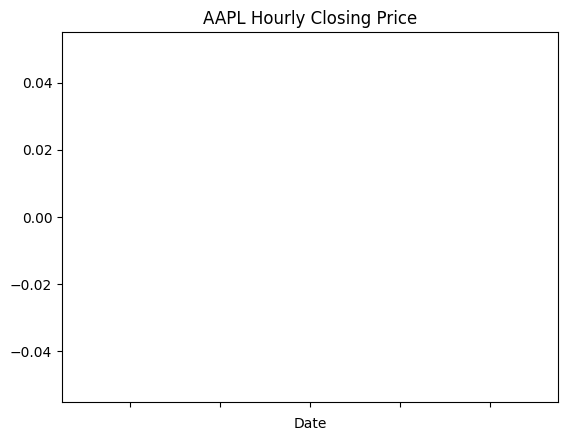

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


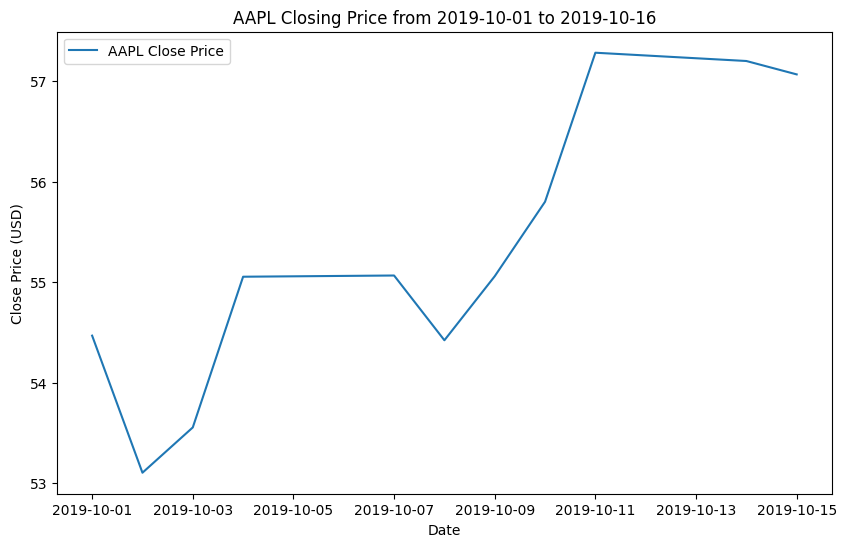

Explained variance ratio: [1.]


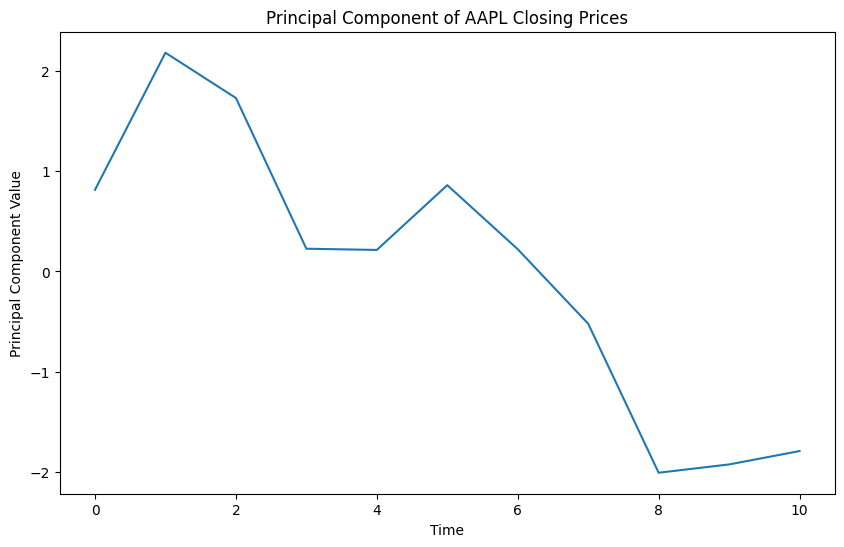

NameError: name 'data' is not defined

In [6]:
#  notebook "HDFTS_DJIA_Forecasting" to succinctly convey the essence of its content: employing High-Dimensional Functional Time Series (HDFTS) methods for forecasting the Dow Jones Industrial Average (DJIA) constituents.
#This title encapsulates the methodology and the specific financial index targeted, making it clear and informative for anyone looking into forecasting financial time series data.

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.tsa.arima_model import ARIMA


# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get historical data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker with a daily frequency
tickerDf = tickerData.history(period='1d', start='2019-10-01', end='2019-10-16')

# Display the first few rows of the dataframe
print(tickerDf.head())

aapl_data = yf.download('AAPL', start='2018-10-03', end='2019-10-16', interval='1h')
aapl_data['Close'].plot(title="AAPL Hourly Closing Price")
plt.show()

# Convert the index to a DatetimeIndex if it's not already
aapl_data.index = pd.to_datetime(aapl_data.index)

# Verify the index type
print(aapl_data.index)

# Assuming data is loaded into a DataFrame aapl_data
# Resample data to get daily closing prices if working with intraday data
daily_close = aapl_data['Close'].resample('D').mean()

# Normalize the daily close prices
normalized_close = (daily_close - daily_close.mean()) / daily_close.std()

import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(10,6))
plt.plot(tickerDf['Close'], label='AAPL Close Price')
plt.title('AAPL Closing Price from 2019-10-01 to 2019-10-16')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'tickerDf' is your DataFrame containing the AAPL data

# Select closing prices
closing_prices = tickerDf['Close']

# Normalize closing prices if desired (for this example, we'll proceed without normalization)
# normalized_close = (closing_prices - closing_prices.mean()) / closing_prices.std()

# Ensure there's no missing data
closing_prices.dropna(inplace=True)

# Check if the data is non-empty
if not closing_prices.empty:
    # Reshape data for PCA
    matrix_data = closing_prices.values.reshape(-1, 1)

    # Apply PCA
    pca = PCA(n_components=1)  # Adjust components based on your analysis needs
    principal_components = pca.fit_transform(matrix_data)

    # Output the explained variance to understand how much information is captured by the PCA
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Plot the principal component
    plt.figure(figsize=(10, 6))
    plt.plot(principal_components)
    plt.title('Principal Component of AAPL Closing Prices')
    plt.xlabel('Time')
    plt.ylabel('Principal Component Value')
    plt.show()
else:
    print("The data is empty. Please check your data loading and preparation steps.")

##################
#guide you through incorporating the additional steps based on the high-dimensional functional time series (HDFTS) forecasting methodology into your notebook, focusing on financial data like the DJIA. However, please note that actual code implementation requires a programming environment such as Python or R.

#1. Data Preparation and Transformation
#After obtaining the intraday prices, the first task is smoothing the data:

from scipy.interpolate import UnivariateSpline

# Assuming `data` is a DataFrame with intraday prices where rows are timestamps and columns are stock symbols

smoothed_data = data.apply(lambda x: UnivariateSpline(data.index, x, s=1), axis=0)
#2. Constructing Matrix-Valued Time Series
#For each time point, create matrices of smoothed values. This step requires reshaping the data based on your specific requirements.

# Example of reshaping smoothed data into a 3D matrix (if applicable)
# This step highly depends on how you decide to structure the matrix-valued time series based on your analysis needs
#3. Applying the Matrix Factor Model
#Decompose the matrix-valued time series using SVD or PCA. Here's a simplified PCA approach:

from sklearn.decomposition import PCA

# Example of applying PCA to each matrix if your data is structured in a way that allows this
pca = PCA(n_components=5)  # Adjust based on the desired number of components
principal_components = pca.fit_transform(smoothed_data.values)  # This may require adjustment based on your data structure
#4. Forecasting with Latent Factors
#Forecast the principal components using a time series model:

from statsmodels.tsa.arima.model import ARIMA

# Example of fitting an ARIMA model to each principal component
# This assumes principal_components is a DataFrame where columns are principal components
model_fits = []
for column in principal_components.columns:
    model = ARIMA(principal_components[column], order=(1, 1, 1))  # Example order, adjust as necessary
    fit = model.fit()
    model_fits.append(fit)
#5. Reconstruction and Forecast Evaluation
#Reconstruct forecasts for the original series and evaluate:


# Example of reconstruction and evaluation - specifics will depend on your model and data structure
reconstructed_forecasts = ...  # Reconstruct using the forecasted components and their loadings

# Example RMSFE calculation
def rmsfe(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

# Calculate RMSFE for each stock/time series
rmsfe_scores = [rmsfe(actuals[column], reconstructed_forecasts[column]) for column in actuals.columns]
#Practical Implementation Notes
#The data structure, especially in steps 2 and 3, will significantly influence how you implement the matrix factor model and the reconstruction process. The provided examples are simplifications to illustrate the process.
#Parameter tuning, especially for the smoothing step and the ARIMA models, is crucial for accurate forecasts.
#Software libraries like sklearn for PCA and statsmodels for ARIMA are powerful tools but require familiarity with their API and data preprocessing needs.
#Finalize your notebook by incorporating these steps with detailed comments and explanations for each part. Remember, the success of forecasting with HDFTS models hinges on carefully preparing the data, selecting appropriate model parameters, and critically evaluating the forecasts against actual observations.